In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

from tqdm import tqdm

plt.rc("font", family = "Malgun Gothic")
plt.rcParams["axes.unicode_minus"] = False

# 자료 불러오기 및 생성

In [2]:
# 기존 자료 + 토론자료 합본 생성 및 저장

# df_speech = pd.read_csv(r"E:\est\kdt\project\president_prediction\data\speech_combined.csv", index_col=0)
# df_debate = pd.read_csv(r"E:\est\kdt\project\president_prediction\data\debate_combined_ver1.csv", index_col=0)

# df_list = [df_speech, df_debate]
# total_speech = pd.concat(df_list, axis=0)
# total_speech = total_speech.reset_index(drop=True)
# total_speech.to_csv(r"E:\est\kdt\project\president_prediction\data\debate_combined_ver2.csv")

In [3]:
total_speech = pd.read_csv(r"E:\est\kdt\project\president_prediction\data\debate_combined_ver2.csv", index_col=0)
total_speech.tail(2)

,name,date,speech,elected,Year,speech_whole,speech_processed,speech_processed2
3395,Donald J. Trump,"October 22, 2020","[""So, as you know, more 2.2 million people, mo...",1,2020,"So, as you know, more 2.2 million people, mode...","['know', '2', '2', 'million', 'people', 'model...","['2', '2', 'million', 'modeled', 'expected', '..."
3396,Donald J. Trump,"September 29, 2020","['How are you doing?', ""Thank you very much, C...",1,2020,"How are you doing? Thank you very much, Chris....","['thank', 'much', 'chris', 'tell', 'simply', '...","['thank', 'much', 'chris', 'tell', 'simply', '..."


In [4]:
# 합본자료 -> KeyBERT 분석한 자료

df_bert = pd.read_csv(r"E:\est\kdt\project\president_prediction\data\KeyBERT_analysis\text_combined.csv", index_col=0)
df_bert.tail(2)

,name,date,speech,elected,Year,speech_whole,speech_processed,speech_processed2,keywords,speech_year
3395,Donald J. Trump,"October 22, 2020","[""So, as you know, more 2.2 million people, mo...",1,2020,"So, as you know, more 2.2 million people, mode...","['know', '2', '2', 'million', 'people', 'model...","['2', '2', 'million', 'modeled', 'expected', '...","[('vaccine coming', 0.5374), ('worldwide pande...",2020
3396,Donald J. Trump,"September 29, 2020","['How are you doing?', ""Thank you very much, C...",1,2020,"How are you doing? Thank you very much, Chris....","['thank', 'much', 'chris', 'tell', 'simply', '...","['thank', 'much', 'chris', 'tell', 'simply', '...","[('phenomenal nominee', 0.4031), ('dame highly...",2020


In [5]:
# 2024년 토론을 KeyBERT 분석한 자료

df_bert_2024 = pd.read_csv(r"E:\est\kdt\project\president_prediction\data\KeyBERT_analysis\2024_combined_v2.csv", index_col=0)
df_bert_2024.tail(2)

,date,speech,name,Year,elected,joined_speech,speech_whole,speech_processed,speech_processed2,keywords,speech_year
2,"January 07, 2021",['I would like to begin by addressing the hein...,Donald J. Trump,2024,0.0,I would like to begin by addressing the heinou...,I would like to begin by addressing the heinou...,"['would', 'like', 'begin', 'addressing', 'hein...","['begin', 'addressing', 'heinous', 'attack', '...","[('elections congress', 0.4297), ('intense ele...",2021
3,"January 23, 2024","['[Music: Lee Greenwood, God Bless the U.S.A.]...",Donald J. Trump,2024,0.0,"[Music: Lee Greenwood, God Bless the U.S.A.] D...","[Music: Lee Greenwood, God Bless the U.S.A.] D...","['donald', 'j', 'trump', 'thank', 'everybody',...","['donald', 'j', 'trump', 'everybody', 'whoa', ...","[('victory speech', 0.4876), ('applause trump'...",2024


In [6]:
# 정형데이터 최종 합본

df_data = pd.read_csv(r"E:\est\kdt\project\president_prediction\data\merged_Data_final_2024GDP.csv")
df_data

,Year,Approval_Rating,CPI,GDP,Unemployment rate,Name,Party,Elections_Won
0,1913,50.000000,9.883333,733625,4.4,NaN,NaN,NaN
1,1914,50.000000,10.016667,677455,8.0,NaN,NaN,NaN
2,1915,50.000000,10.108333,695924,9.7,NaN,NaN,NaN
3,1916,50.000000,10.883333,792425,4.8,Woodrow Wilson,Democratic,2.0
4,1917,50.000000,12.825000,772825,4.8,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
107,2020,41.100000,258.811167,20234100,8.1,Joe Biden,Democratic,1.0
108,2021,41.100000,270.969750,21407700,5.3,NaN,NaN,NaN
109,2022,41.354119,292.654917,21822000,3.6,NaN,NaN,NaN
110,2023,40.184738,304.701583,22376900,NaN,NaN,NaN,NaN


### 데이터 병합

In [7]:
df_1 = total_speech.copy() # 텍스트 데이터
df_2 = df_data.copy() # 정형 데이터

df_2.drop(111, axis=0, inplace=True) # 2024년 데이터 드랍....

# 정형데이터 4년 단위로 변신
years_to_keep = list(range(1916, 2025, 4))
df_2 = df_2[df_2['Year'].isin(years_to_keep)]

# 병합을 위한 신규 컬럼 생성 - 텍스트 데이터
last_name =[] # 리스트로 데이터 만들고 컬럼에 값으로 채우기
for sen in df_1['name']:
    lname = sen.split()[-1]
    last_name.append(lname)
df_1['LastName'] = last_name # 데이터 채우기

# 병합을 위한 신규 컬럼 생성 - 정형 데이터
last_name =[] # 리스트로 데이터 만들고 컬럼에 값으로 채우기
for sen in df_2['Name']:
    lname = sen.split()[-1]
    last_name.append(lname)
df_2['LastName'] = last_name # 데이터 채우기

merge_data = pd.merge(df_1, df_2, on=['LastName', 'Year'], how='left')
merge_data.head()

,name,date,speech,elected,Year,speech_whole,speech_processed,speech_processed2,LastName,Approval_Rating,CPI,GDP,Unemployment rate,Name,Party,Elections_Won
0,Charles E. Hughes,"June 10, 1916","['Mr. Chairman and Delegates:', 'I have not de...",0,1916,Mr. Chairman and Delegates: I have not desired...,"['mr', 'chairman', 'delegates', 'desired', 'no...","['mr', 'chairman', 'delegates', 'desired', 'no...",Hughes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Woodrow Wilson,"September 02, 1916","['Senator James, Gentlemen of the Notification...",1,1916,"Senator James, Gentlemen of the Notification C...","['senator', 'james', 'gentlemen', 'notificatio...","['senator', 'james', 'gentlemen', 'notificatio...",Wilson,50.0,10.883333,792425.0,4.8,Woodrow Wilson,Democratic,2.0
2,James M. Cox,"August 07, 1920","['Chairman Robinson, and members of the Notifi...",0,1920,"Chairman Robinson, and members of the Notifica...","['chairman', 'robinson', 'members', 'notificat...","['chairman', 'robinson', 'members', 'notificat...",Cox,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Warren G. Harding,"July 22, 1920","['Chairman Lodge, Members of the Notification ...",1,1920,"Chairman Lodge, Members of the Notification Co...","['chairman', 'lodge', 'members', 'notification...","['chairman', 'lodge', 'members', 'notification...",Harding,50.0,20.041667,841350.0,4.0,Warren G. Harding,Republican,1.0
4,Calvin Coolidge,"August 14, 1924","['Mr. Chairman, Members of the Committee, Ladi...",1,1924,"Mr. Chairman, Members of the Committee, Ladies...","['mr', 'chairman', 'members', 'committee', 'la...","['mr', 'chairman', 'members', 'committee', 'la...",Coolidge,55.0,17.125000,1012202.0,5.5,Calvin Coolidge,Republican,1.0


In [8]:
# Party 채우기

sorted_data = merge_data.sort_values(by='Year')
filled_party = sorted_data[sorted_data['Party'].notnull()]

time_win_party = {}
for time in range(1916, 2024, 4):
    win_party = filled_party[filled_party['Year'] ==time]['Party'].values[0]
    if win_party == 'Republican':
        time_win_party[time] = 'Democratic'
    elif win_party =='Democratic':
        time_win_party[time] = 'Republican'

for idx, row in merge_data.iterrows():
    if pd.isnull(row['Party']):
        nan_year = row['Year']
        merge_data.loc[idx, 'Party'] = time_win_party[nan_year]
        
merge_data['Party'].isnull().sum() # 혹시 결측 있나 확인 0 이면 정상

0

- Elections_Won 결측 채우기<br>

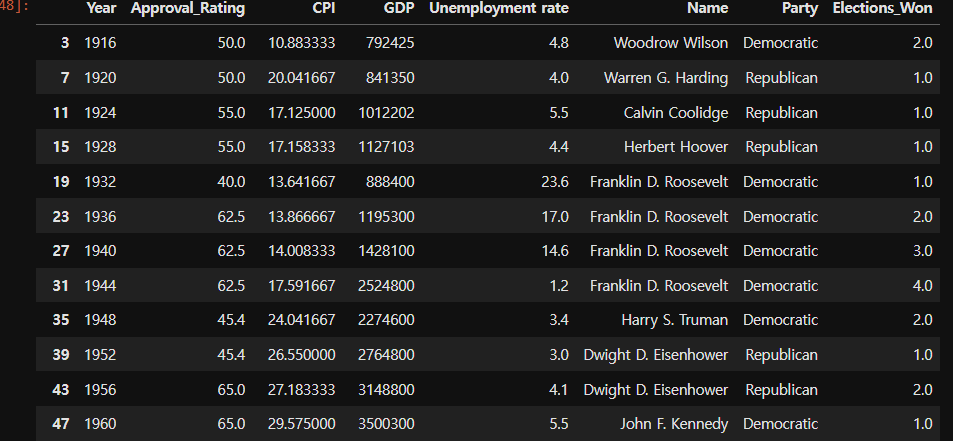

In [9]:
# 역시 left조인으로 잘 알맞게 달라 붙은 것 같다. -> 결측치는 모두 당선 한번도 안된사람인것을 알 수 있다.
merge_data[merge_data['Name'] =='Dwight D. Eisenhower'] # 여기서 컬럼을 이름만 바꿔서하면 안되는 이유 나옴. name으로는 검색안됨. 신규 컬럼 만들었어야함
merge_data['Elections_Won'].fillna(0, inplace=True)

In [10]:
# 최종으로 만들었던 컬럼 제거

merge_data.drop(['Name','LastName'], axis=1, inplace=True)
merge_data.head()

,name,date,speech,elected,Year,speech_whole,speech_processed,speech_processed2,Approval_Rating,CPI,GDP,Unemployment rate,Party,Elections_Won
0,Charles E. Hughes,"June 10, 1916","['Mr. Chairman and Delegates:', 'I have not de...",0,1916,Mr. Chairman and Delegates: I have not desired...,"['mr', 'chairman', 'delegates', 'desired', 'no...","['mr', 'chairman', 'delegates', 'desired', 'no...",NaN,NaN,NaN,NaN,Republican,0.0
1,Woodrow Wilson,"September 02, 1916","['Senator James, Gentlemen of the Notification...",1,1916,"Senator James, Gentlemen of the Notification C...","['senator', 'james', 'gentlemen', 'notificatio...","['senator', 'james', 'gentlemen', 'notificatio...",50.0,10.883333,792425.0,4.8,Democratic,2.0
2,James M. Cox,"August 07, 1920","['Chairman Robinson, and members of the Notifi...",0,1920,"Chairman Robinson, and members of the Notifica...","['chairman', 'robinson', 'members', 'notificat...","['chairman', 'robinson', 'members', 'notificat...",NaN,NaN,NaN,NaN,Democratic,0.0
3,Warren G. Harding,"July 22, 1920","['Chairman Lodge, Members of the Notification ...",1,1920,"Chairman Lodge, Members of the Notification Co...","['chairman', 'lodge', 'members', 'notification...","['chairman', 'lodge', 'members', 'notification...",50.0,20.041667,841350.0,4.0,Republican,1.0
4,Calvin Coolidge,"August 14, 1924","['Mr. Chairman, Members of the Committee, Ladi...",1,1924,"Mr. Chairman, Members of the Committee, Ladies...","['mr', 'chairman', 'members', 'committee', 'la...","['mr', 'chairman', 'members', 'committee', 'la...",55.0,17.125000,1012202.0,5.5,Republican,1.0


# 데이터 전처리

In [11]:
merge_data.isnull().sum()[merge_data.isnull().sum() != 0]

Approval_Rating      1371
CPI                  1371
GDP                  1371
Unemployment rate    1371
dtype: int64

In [12]:
df_anal = merge_data.copy()
df_anal.drop(['Approval_Rating','CPI','GDP','Unemployment rate','speech'], axis=1, inplace=True)

for idx, row in df_anal.iterrows():
    df_anal.loc[idx, 'name'] = row['name'].strip()
    df_anal.loc[idx, 'Party'] = row['Party'].strip()

# df_anal['Year'] = pd.to_datetime(df_anal['Year']) # 년도는 그냥 두는게 나을지도?
df_anal['date'] = pd.to_datetime(df_anal['date'], format='%B %d, %Y')
df_anal['Party'] = df_anal['Party'].astype('category')
df_anal['name'] = df_anal['name'].astype('category')
df_anal['elected'] = df_anal['elected'].astype('float64')

df_anal.info()
df_anal.tail(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3397 entries, 0 to 3396
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   name               3397 non-null   category      
 1   date               3397 non-null   datetime64[ns]
 2   elected            3397 non-null   float64       
 3   Year               3397 non-null   int64         
 4   speech_whole       3397 non-null   object        
 5   speech_processed   3397 non-null   object        
 6   speech_processed2  3397 non-null   object        
 7   Party              3397 non-null   category      
 8   Elections_Won      3397 non-null   float64       
dtypes: category(2), datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 194.0+ KB


,name,date,elected,Year,speech_whole,speech_processed,speech_processed2,Party,Elections_Won
3394,Joseph R. Biden,2020-09-29,1.0,2020,"How you doing, man? I'm well. Well, first of a...","['man', 'im', 'well', 'well', 'first', 'thank'...","['man', 'im', 'thank', 'looking', 'forward', '...",Democratic,1.0
3395,Donald J. Trump,2020-10-22,1.0,2020,"So, as you know, more 2.2 million people, mode...","['know', '2', '2', 'million', 'people', 'model...","['2', '2', 'million', 'modeled', 'expected', '...",Republican,0.0
3396,Donald J. Trump,2020-09-29,1.0,2020,"How are you doing? Thank you very much, Chris....","['thank', 'much', 'chris', 'tell', 'simply', '...","['thank', 'much', 'chris', 'tell', 'simply', '...",Republican,0.0


In [40]:
# 해당 연도에 대한 후보자별 연설 횟수
# 연도당 후보 연설 자료가 몇개있는지 파악하기 위해서 필요함

years = []
speech_gap = []
data_cnt ={}
for year in range(1916, 2024, 4):
    name, cnt = np.unique(df_anal[['name']][df_anal['Year'] == year], return_counts=True)
    data_cnt[f'{name[0]}_{year}'] = cnt[0]
    data_cnt[f'{name[1]}_{year}'] = cnt[1]
    speech_gap.append(np.abs(cnt[0]-cnt[1]))
    speech_gap.append(np.abs(cnt[0]-cnt[1]))
    years.append(year)
    years.append(year)
    
df_cnt = pd.DataFrame(data_cnt.items(), columns=['name_year', 'speech_count'])
df_cnt['speech_gap'] = speech_gap
df_cnt['year'] = years
df_cnt = df_cnt.reindex(columns=['year', 'name_year', 'speech_count', 'speech_gap'])

df_cnt.tail(3)

,year,name_year,speech_count,speech_gap
51,2016,Hillary Clinton_2016,92,13
52,2020,Donald J. Trump_2020,8,55
53,2020,Joseph R. Biden_2020,63,55


# 데이터 분석

### 1) 문서 개수 파악

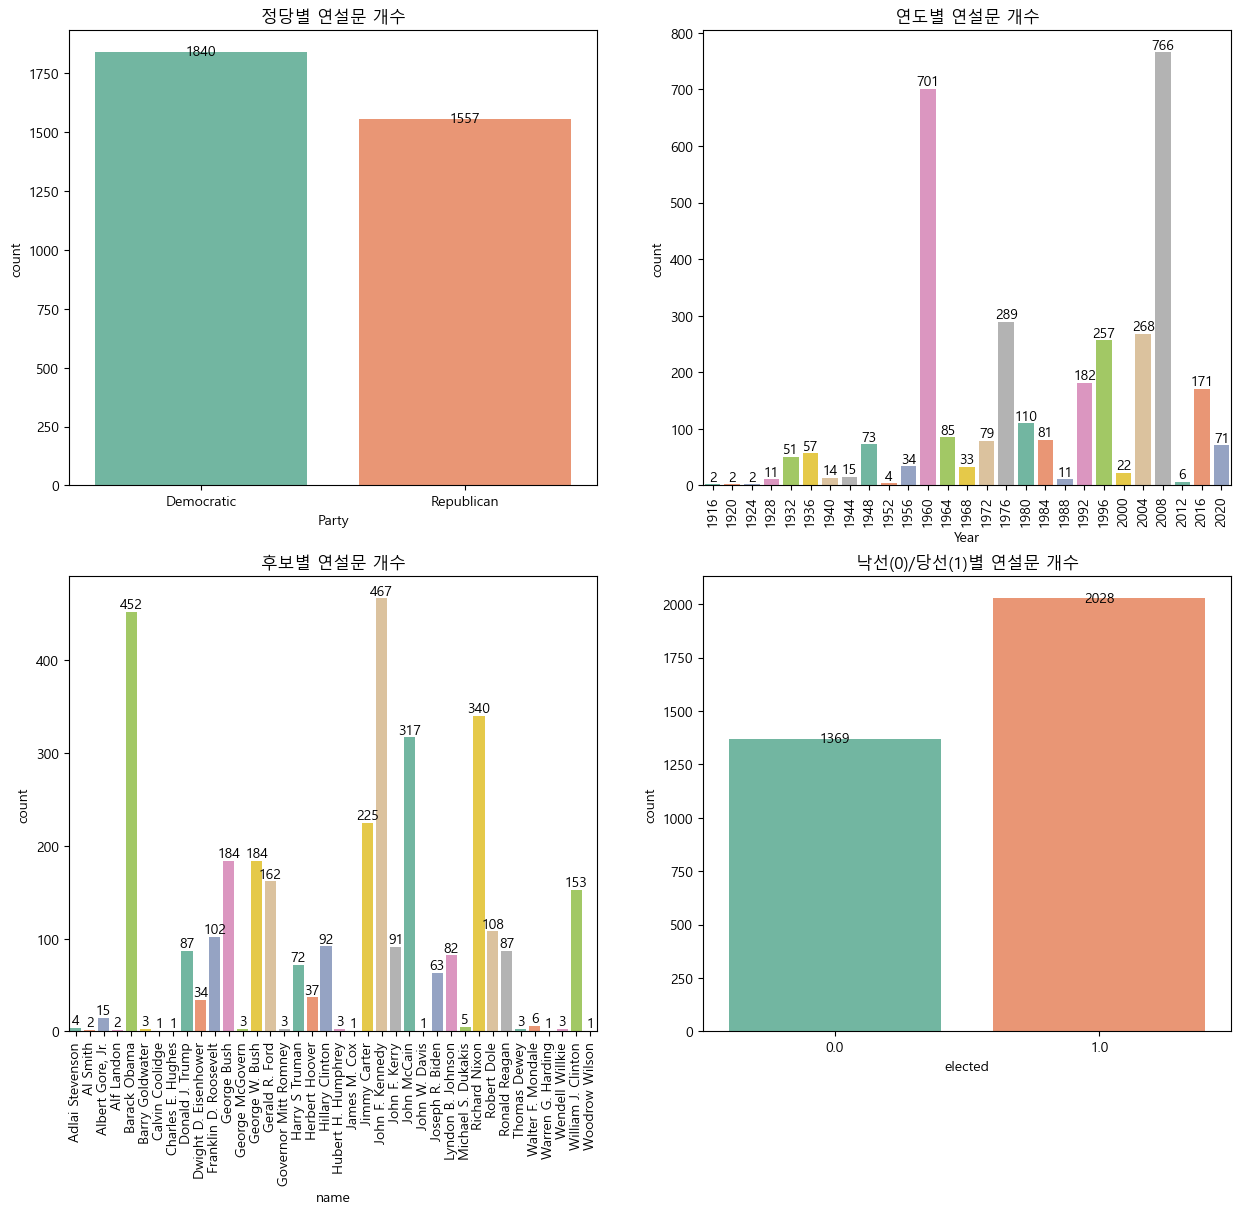

In [14]:
# 문서 개수
fig, axes = plt.subplots(2,2,figsize=(15, 13))
(ax1, ax2, ax3, ax4) = axes.flatten()

# 정당
sns.countplot(x='Party', data=df_anal, palette='Set2', ax=ax1)
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 0), 
                textcoords = 'offset points')
ax1.set(title='정당별 연설문 개수')

# 연도
sns.countplot(x='Year', data=df_anal, palette='Set2', ax=ax2)
for p in ax2.patches:
    ax2.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 5), 
                textcoords = 'offset points')
ax2.set(title='연도별 연설문 개수')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)

# 후보
sns.countplot(x='name', data=df_anal, palette='Set2', ax=ax3)
for p in ax3.patches:
    ax3.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 5), 
                textcoords = 'offset points')
ax3.set(title='후보별 연설문 개수')
ax3.set_xticklabels(ax3.get_xticklabels(), rotation=90)

# 당낙선
sns.countplot(x='elected', data=df_anal, palette='Set2', ax=ax4)
for p in ax4.patches:
    ax4.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 0), 
                textcoords = 'offset points')
ax4.set(title='낙선(0)/당선(1)별 연설문 개수')

plt.show()

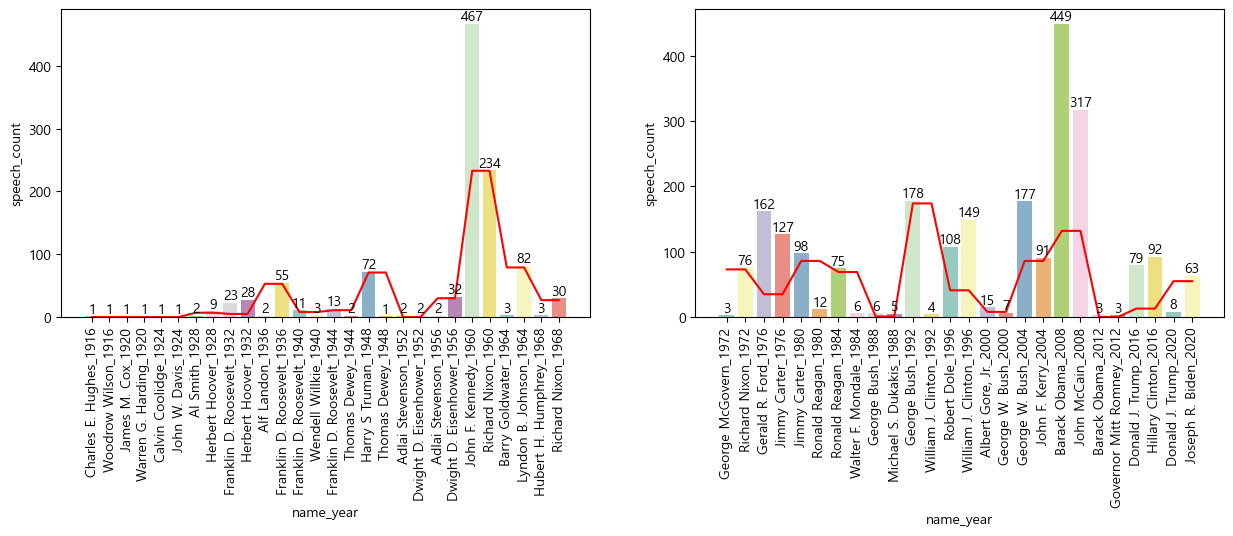

In [46]:
# 해당 연도에 대한 후보자별 문서 개수
fig, axes = plt.subplots(1,2,figsize=(15,4))
(ax1, ax2) = axes.flatten()

sns.barplot(x='name_year', y='speech_count', data=df_cnt[:28], palette='Set3', ax=ax1)
sns.lineplot(x='name_year', y='speech_gap', data=df_cnt[:28], color='red', ax=ax1)
for p in ax1.patches:
    ax1.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 5), 
                textcoords = 'offset points')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90)

sns.barplot(x='name_year', y='speech_count', data=df_cnt[28:], palette='Set3', ax=ax2)
sns.lineplot(x='name_year', y='speech_gap', data=df_cnt[28:], color='red', ax=ax2)
for p in ax2.patches:
    ax2.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 5), 
                textcoords = 'offset points')
ax2.set_xticklabels(ax2.get_xticklabels(), rotation=90)

plt.show()

In [52]:
df_cnt.sort_values(['speech_gap', 'speech_count'], ascending=False)

,year,name_year,speech_count,speech_gap
22,1960,John F. Kennedy_1960,467,233
23,1960,Richard Nixon_1960,234,233
38,1992,George Bush_1992,178,174
39,1992,William J. Clinton_1992,4,174
46,2008,Barack Obama_2008,449,132
47,2008,John McCain_2008,317,132
44,2004,George W. Bush_2004,177,86
32,1980,Jimmy Carter_1980,98,86
45,2004,John F. Kerry_2004,91,86
33,1980,Ronald Reagan_1980,12,86


## 2. 분야별 분석

### 200개 코퍼스로 생성

In [20]:
def corpus_freq(field_keyword):
    keyowrd_freq_1 = []
    speech = df_anal['speech_whole']
    
    for sen in tqdm(speech):
        cnt=0
        for keyword in field_keyword:
            if keyword in sen.lower():
                cnt+=1
        keyowrd_freq_1.append(cnt)        
    return keyowrd_freq_1

### 1) 과학 키워드로 빈도수 분석

In [21]:
# 과학관련 키워드 500

sci_keyword = ['biology', 'chemistry', 'physics', 'astronomy', 'geology', 'ecology', 'genetics', 'botany', 'zoology', 'meteorology', 'microbiology', 'biochemistry', 'biotechnology', 'neuroscience', 'astronomical', 'geological', 'chemical', 'physical', 'biological', 'ecological', 'genetic', 'zoological', 'microbial', 'biomedical', 'cytology', 'radiology', 'nuclear', 'quantum', 'thermodynamics', 'geophysics', 'environmental', 'molecular', 'evolutionary', 'organic', 'inorganic', 'neurological', 'entomology', 'mycology', 'oceanography', 'seismology', 'petrology', 'virology', 'parasitology', 'immunology', 'embryology', 'anatomy', 'physiology', 'botanical', 'ornithology', 'herpetology', 'endocrinology', 'histology', 'pathology', 'pharmacology', 'toxicology', 'epidemiology', 'bioinformatics', 'biodiversity', 'cryogenics', 'thermometer', 'spectrometer', 'electromagnetism', 'photosynthesis', 'mitochondria', 'ribosome', 'chromosome', 'nucleotide', 'electron', 'proton', 'neutron', 'atom', 'molecule', 'element', 'compound', 'organic', 'inorganic', 'enzyme', 'hormone', 'antibody', 'vaccine', 'antigen', 'virus', 'bacteria', 'fungus', 'algae', 'protist', 'ecosystem', 'biome', 'food chain', 'food web', 'climate change', 'global warming', 'ozone layer', 'acid rain', 'pollution', 'carbon footprint', 'renewable energy', 'sustainable', 'conservation', 'ecological footprint', 'biomimicry', 'DNA', 'RNA', 'genomics', 'cloning', 'stem cells', 'nanotechnology', 'biodegradable', 'symbiosis', 'predation', 'commensalism', 'mutualism', 'parasitism', 'homeostasis', 'osmosis', 'diffusion', 'photosynthesis', 'respiration', 'mitosis', 'meiosis', 'ecological succession', 'natural selection', 'adaptation', 'mutation', 'genetic engineering', 'cybernetics', 'telecommunications', 'biomass', 'biodiversity', 'conservation', 'solar energy', 'wind energy', 'hydroelectric', 'geothermal', 'fossil fuels', 'deforestation', 'overfishing', 'habitat loss', 'acidification', 'biological diversity', 'ecosystem services', 'renewable resources', 'energy conservation', 'water conservation', 'pollination', 'carbon cycle', 'nitrogen cycle', 'phosphorus cycle', 'greenhouse effect', 'carbon dioxide', 'methane', 'oxygen', 'nitrogen', 'hydrogen', 'helium', 'carbon', 'sodium', 'potassium', 'calcium', 'magnesium', 'iron', 'zinc', 'copper', 'manganese', 'iodine', 'fluorine', 'phosphorus', 'sulfur', 'chlorine', 'bromine', 'arsenic', 'mercury', 'lead', 'cadmium', 'chromium', 'nickel', 'tin', 'titanium', 'silicon', 'boron', 'gold', 'silver', 'platinum', 'palladium', 'rhodium', 'ruthenium', 'osmium', 'iridium', 'cobalt', 'vanadium', 'tungsten', 'molybdenum', 'thallium', 'antimony', 'bismuth', 'tellurium', 'rubidium', 'cesium', 'strontium', 'barium', 'lanthanum', 'cerium', 'praseodymium', 'neodymium', 'promethium', 'samarium', 'europium', 'gadolinium', 'terbium', 'dysprosium', 'holmium', 'erbium', 'thulium', 'ytterbium', 'lutetium', 'actinium', 'thorium', 'uranium', 'plutonium', 'americium', 'curium', 'berkelium', 'californium', 'einsteinium', 'fermium', 'mendelevium', 'nobelium', 'lawrencium', 'rutherfordium', 'dubnium', 'seaborgium', 'bohrium', 'hassium', 'meitnerium', 'darmstadtium', 'roentgenium', 'copernicium', 'nihonium', 'flerovium', 'moscovium', 'livermorium', 'tennessine', 'oganesson', 'astronomy', 'astrophysics', 'cosmology', 'stellar', 'galaxy', 'planet', 'solar', 'system', 'comet', 'asteroid', 'meteoroid', 'meteorite', 'meteor', 'gravity', 'gravitational', 'force', 'orbit', 'rotation', 'revolution', 'axis', 'eclipse', 'lunar', 'solar', 'celestial', 'body', 'cosmos', 'universe', 'black', 'hole', 'neutron', 'star', 'white', 'dwarf', 'supernova', 'dark', 'matter', 'dark', 'energy', 'big', 'bang', 'theory', 'quantum', 'mechanics', 'particle', 'physics', 'nuclear', 'physics', 'atomic', 'structure', 'electron', 'proton', 'neutron', 'quark', 'boson', 'fermion', 'hadron', 'lepton', 'matter', 'antimatter', 'energy', 'wave', 'particle', 'duality', 'string', 'theory', 'multiverse', 'relativity', 'theory', 'general', 'relativity', 'special', 'relativity', 'space', 'time', 'spacetime', 'cosmic', 'inflation', 'thermal', 'radiation', 'redshift', 'blueshift', 'electromagnetic', 'spectrum', 'light', 'photon', 'wave', 'wavelength', 'frequency', 'energy', 'solar', 'radiation', 'radiation', 'spectrum', 'visible', 'infrared', 'ultraviolet', 'x-ray', 'gamma-ray', 'radio', 'microwave', 'telescope', 'observatory', 'hubble', 'space', 'telescope', 'astronomical', 'observation', 'stellar', 'classification', 'star', 'formation', 'protostar', 'main', 'sequence', 'giant', 'supergiant', 'white', 'dwarf', 'black', 'hole', 'neutron', 'star', 'pulsar', 'quasar', 'cosmic', 'ray', 'nebula', 'interstellar', 'medium', 'planetary', 'formation', 'planet', 'formation', 'exoplanet', 'extrasolar', 'planet', 'planetary', 'system', 'orbit', 'kepler', 'mission', 'galactic', 'structure', 'milky', 'way', 'galaxy', 'andromeda', 'galaxy', 'star', 'cluster', 'globular', 'cluster', 'open', 'cluster', 'interstellar', 'cloud', 'cosmic', 'dust', 'interstellar', 'gas', 'cosmic', 'background', 'radiation', 'cosmic', 'microwave', 'background', 'cmb', 'astronomical', 'distance', 'parallax', 'parse', 'light-year', 'astronomical', 'unit', 'astronomical', 'measurement', 'astronomical', 'instrumentation', 'solar', 'observation', 'sun', 'sunspot', 'solar', 'flare', 'corona', 'solar', 'wind', 'solar', 'eclipse', 'lunar', 'eclipse', 'solar', 'system', 'inner', 'planet', 'outer', 'planet', 'gas', 'giant', 'ice', 'giant', 'terrestrial', 'planet', 'mercury', 'venus', 'earth', 'mars', 'jupiter', 'saturn', 'uranus', 'neptune', 'pluto', 'dwarf', 'planet', 'asteroid', 'belt', 'kuiper', 'belt', 'oort', 'cloud', 'planetesimal', 'meteoroid', 'meteor', 'meteorite', 'comet', 'oxygen', 'carbon', 'hydrogen', 'nitrogen', 'helium', 'iron', 'silicon', 'molecule', 'atom', 'chemical', 'element', 'compound', 'reaction', 'bond', 'ionic', 'covalent', 'polar', 'nonpolar', 'organic', 'inorganic', 'molecular', 'biology', 'cell', 'biology', 'microbiology', 'genetics', 'DNA', 'RNA', 'protein', 'enzyme', 'gene', 'genome', 'mutation', 'heredity', 'inheritance', 'evolution', 'natural', 'selection', 'adaptation', 'speciation', 'fossil', 'paleontology', 'geology', 'earthquake', 'volcano', 'plate', 'tectonics', 'continental', 'drift', 'geological', 'erosion', 'sedimentation', 'igneous', 'rock', 'metamorphic', 'rock', 'sedimentary', 'rock', 'mineral', 'crystal', 'geological', 'formation', 'stratigraphy', 'paleoclimate', 'paleoenvironment', 'paleogeography', 'paleobiology', 'paleoecology', 'astronomy', 'astrophysics', 'cosmology', 'stellar', 'galaxy', 'planet', 'solar', 'system', 'comet', 'asteroid', 'meteoroid', 'meteorite',
              ]
sci_keyword = set(sci_keyword)
len(sci_keyword)

414

In [22]:
sci_cnt = corpus_freq(sci_keyword)

100%|███████| 3397/3397 [01:21<00:00, 41.79it/s]


In [23]:
df_1 = df_anal.copy()

df_1['sci_cnt'] = sci_cnt
df_cnt = df_1[['sci_cnt','name','Year','elected']]
df_cnt.sort_values(by='sci_cnt', ascending=False)[:10]

,sci_cnt,name,Year,elected
1174,54,Jimmy Carter,1976,1.0
3296,50,Joseph R. Biden,2020,1.0
2,49,James M. Cox,1920,0.0
1201,49,Jimmy Carter,1976,1.0
3310,49,Joseph R. Biden,2020,1.0
2918,48,Barack Obama,2008,1.0
1203,46,Jimmy Carter,1976,1.0
1161,46,Jimmy Carter,1976,1.0
3336,46,Donald J. Trump,2020,0.0
19,45,Herbert Hoover,1932,0.0


In [24]:
df_cnt.pivot_table(index=['Year','name'], aggfunc=np.sum)

elected  sci_cnt
Year name                                
1916 Adlai Stevenson         0.0        0
     Al Smith                0.0        0
     Albert Gore, Jr.        0.0        0
     Alf Landon              0.0        0
     Barack Obama            0.0        0
...                          ...      ...
2020 Walter F. Mondale       0.0        0
     Warren G. Harding       0.0        0
     Wendell Willkie         0.0        0
     William J. Clinton      0.0        0
     Woodrow Wilson          0.0        0

[1026 rows x 2 columns]

### 2) 경제 키워드로 빈도수 분석

In [25]:
# 경제 키워드 500개

econ_keyword = [
'economics', 'economy', 'economic', 'finance', 'financial', 'market', 'markets', 'trade', 'trading', 'commerce', 'business', 'entrepreneurship', 'entrepreneur', 'entrepreneurs', 'startup', 'startups', 'investment', 'investments', 'investing', 'investor', 'investors', 'capital', 'venture', 'capitalist', 'capitalists', 'capitalism', 'capitalist', 'profit', 'profits', 'profitable', 'loss', 'losses', 'cost', 'costs', 'costly', 'costing', 'budget', 'budgets', 'budgeting', 'spending', 'expenditure', 'expenditures', 'income', 'incomes', 'expense', 'expenses', 'revenue', 'revenues', 'tax', 'taxes', 'taxation', 'taxes', 'taxpayer', 'taxpayers', 'budgetary', 'deficit', 'deficits', 'debt', 'debts', 'creditor', 'creditors', 'credit', 'credits', 'bank', 'banks', 'banking', 'banker', 'bankers', 'finance', 'financing', 'financial', 'finances', 'monetary', 'fiscal', 'policy', 'policies', 'inflation', 'deflation', 'GDP', 'GNP', 'GNI', 'CPI', 'PPI', 'interest', 'rate', 'rates', 'currency', 'currencies', 'exchange', 'rate', 'rates', 'bond', 'bonds', 'stock', 'stocks', 'equity', 'assets', 'liabilities', 'shares', 'shareholder', 'shareholders', 'dividend', 'dividends', 'income', 'wealth', 'wealthy', 'poverty', 'poor', 'development', 'developing', 'developed', 'develops', 'recession', 'recessions', 'depression', 'depressions', 'recovery', 'recoveries', 'growth', 'growth', 'grows', 'growth', 'economic', 'economies', 'industrial', 'industries', 'industrialization', 'industrialize', 'industry', 'industries', 'industrial', 'globalization', 'global', 'globalize', 'globalizes', 'globalized', 'globalizing', 'international', 'internationally', 'world', 'internationalize', 'internationalization', 'marketplace', 'markets', 'market', 'marketplaces', 'marketed', 'marketable', 'markets', 'market', 'competition', 'competitive', 'competes', 'competitors', 'competitiveness', 'monopoly', 'monopolies', 'monopolistic', 'oligopoly', 'oligopolies', 'cartel', 'cartels', 'corporation', 'corporations', 'corporate', 'enterprises', 'enterprise', 'entrepreneurs', 'enterprise','supply', 'demand', 'equilibrium', 'scarcity', 'abundance', 'efficiency', 'inefficiency', 'utility', 'cost-benefit', 'cost-effective', 'transaction', 'transactions', 'transactional', 'marketplace', 'commodity', 'commodities', 'commoditized', 'goods', 'services', 'consumer', 'consumers', 'consumption', 'producer', 'producers', 'production', 'productive', 'output', 'input', 'factor', 'factors', 'factorial', 'labor', 'labour', 'workforce', 'employment', 'unemployment', 'unemployed', 'jobless', 'jobs', 'occupation', 'occupational', 'occupations', 'occupation', 'enterprise', 'enterprises', 'entreprenurial', 'entreprenurship', 'entreprenurial', 'bank', 'banking', 'banker', 'bankers', 'financial', 'funds', 'fund', 'funding', 'funded', 'invest', 'investment', 'investments', 'investor', 'investors', 'capital', 'venture', 'venture', 'ventures', 'venture', 'capital', 'capitalism', 'capitalist', 'capitalists', 'profit', 'profits', 'profitable', 'non-profit', 'non-profitable', 'loss', 'losses', 'income', 'incomes', 'expense', 'expenses', 'expenditure', 'expenditures', 'revenue', 'revenues', 'tax', 'taxes', 'taxed', 'taxing', 'taxable', 'taxation', 'monetary', 'currency', 'currencies', 'exchange', 'exchanges', 'rate', 'rates', 'bond', 'bonds', 'stock', 'stocks', 'equity', 'equities', 'asset', 'assets', 'liability', 'liabilities', 'balance', 'balances', 'economic', 'economics', 'economist', 'economists', 'economical', 'economically', 'economy', 'economies', 'econometric', 'econometrics', 'GDP', 'GNP', 'PPI', 'CPI', 'inflation', 'inflated', 'deflation', 'deflated', 'recession', 'recessional', 'depression', 'depressions', 'boom', 'booms', 'bust', 'busts', 'growth', 'grows', 'growing', 'growth', 'global', 'globalization', 'globalized', 'globalizing', 'international', 'internationally', 'world', 'develop', 'development', 'developing', 'developed', 'industrial', 'industrialization', 'industrialize', 'industry', 'industries', 'markets', 'market', 'marketed', 'marketable', 'marketing', 'marketplace', 'competition', 'compete', 'competitor', 'competitors', 'competitive', 'competitiveness', 'monopoly', 'monopolistic', 'oligopoly', 'oligopolistic', 'cartel', 'cartels', 'corporation', 'corporations', 'corporate', 'corporate', 'entrepreneur', 'entrepreneurs', 'entrepreneurial', 'enterprise', 'enterprises', 'business', 'businesses', 'commerce', 'commercial', 'transaction', 'transactions'
]
econ_keyword = set(econ_keyword)
len(econ_keyword)

233

In [26]:
econ_cnt = corpus_freq(econ_keyword)

100%|███████| 3397/3397 [00:46<00:00, 73.21it/s]


In [27]:
df_1 = df_anal.copy()

df_1['econ_cnt'] = econ_cnt

df_cnt = df_1[['econ_cnt','name','Year','elected']]
df_cnt.sort_values(by='econ_cnt', ascending=False)[:10]

,econ_cnt,name,Year,elected
3122,103,Hillary Clinton,2016,0.0
19,99,Herbert Hoover,1932,0.0
6,98,Herbert Hoover,1928,1.0
49,91,Franklin D. Roosevelt,1932,1.0
2918,89,Barack Obama,2008,1.0
15,86,Al Smith,1928,0.0
39,85,Herbert Hoover,1932,0.0
10,85,Herbert Hoover,1928,1.0
53,85,Franklin D. Roosevelt,1932,1.0
2,85,James M. Cox,1920,0.0


### 3) 환경 키워드로 빈도수 분석

In [28]:
# 환경 키워드 500개

env_keyword = ['environment', 'ecology', 'ecosystem', 'biosphere', 'biodiversity', 'conservation', 'sustainability', 'climate', 'change', 'global', 'warming', 'greenhouse', 'effect', 'carbon', 'footprint', 'pollution', 'recycle', 'reduce', 'reuse', 'decomposition', 'deforestation', 'afforestation', 'reforestation', 'desertification', 'drought', 'flood', 'tornado', 'hurricane', 'typhoon', 'tsunami', 'avalanche', 'landslide', 'erosion', 'soil', 'conservation', 'acid', 'rain', 'ozone', 'layer', 'wildfire', 'invasive', 'species', 'endangered', 'species', 'extinct', 'species', 'habitat', 'loss', 'habitat', 'fragmentation', 'wetland', 'marsh', 'swamp', 'estuary', 'coastal', 'marine', 'freshwater', 'terrestrial', 'aquatic', 'arctic', 'tundra', 'taiga', 'temperate', 'forest', 'grassland', 'savanna', 'desert', 'tropical', 'rainforest', 'coral', 'reef', 'mangrove', 'kelp', 'benthic', 'pelagic', 'benthos', 'plankton', 'nekton', 'coral', 'bleaching', 'overfishing', 'bycatch', 'marine', 'debris', 'ocean', 'acidification', 'sea', 'level', 'rise', 'melting', 'ice', 'cap', 'glacier', 'permafrost', 'methane', 'hydrate', 'thermal', 'pollution', 'thermal', 'inversion', 'e-waste', 'radioactive', 'nuclear', 'fallout', 'toxic', 'chemical', 'hazardous', 'solid', 'liquid', 'gas', 'sustainable', 'development', 'renewable', 'energy', 'alternative', 'clean', 'solar', 'wind', 'hydroelectric', 'geothermal', 'bioenergy', 'biomass', 'tidal', 'wave', 'environmental', 'impact', 'assessment', 'statement', 'audit', 'monitoring', 'protection', 'regulation', 'legislation', 'law', 'policy', 'management', 'biology', 'restoration', 'economics', 'footprint', 'neutral', 'building', 'technology', 'environmentalism', 'ecofriendly', 'reporting', 'goals', 'hotspot', 'natural', 'reserve', 'national', 'park', 'wildlife', 'sanctuary', 'protected', 'area', 'education', 'awareness', 'movement', 'advocacy', 'activism', 'justice', 'ethics', 'integrity', 'balance', 'service', 'capital', 'sequestration', 'offset', 'resource', 'nonrenewable', 'extractive', 'industry', 'use', 'practices', 'stewardship', 'greenwashing', 'consulting', 'trading', 'credits', 'pricing', 'economy', 'low', 'circular', 'zero', 'program', 'composting', 'farming', 'permaculture', 'gardening', 'garden', 'rainwater', 'harvesting', 'urban', 'planning', 'certification', 'architecture', 'design', 'engineering', 'chemistry', 'engineering', 'technology', 'restoration', 'conflict', 'resolution', 'health', 'toxicology', 'epidemiology', 'risk', 'assessment', 'materials', 'waste', 'air', 'quality', 'remediation', 'clean-up', 'compliance', 'audit', 'evaluation', 'system', 'performance', 'measurement', 'diagnosis', 'prescription', 'remedy', 'solution', 'treatment', 'plan', 'program', 'strategy', 'approach', 'method', 'technique', 'instrument', 'tool', 'allocation', 'evaluation']
env_keyword = set(env_keyword)
len(env_keyword)

221

In [29]:
env_cnt = corpus_freq(env_keyword)

100%|███████| 3397/3397 [00:44<00:00, 75.93it/s]


In [30]:
df_1 = df_anal.copy()

df_1['env_cnt'] = env_cnt

df_cnt = df_1[['env_cnt','name','Year','elected']]
df_cnt.sort_values(by='env_cnt', ascending=False)[:10]

,env_cnt,name,Year,elected
2468,77,John McCain,2008,0.0
1201,74,Jimmy Carter,1976,1.0
2,61,James M. Cox,1920,0.0
1174,60,Jimmy Carter,1976,1.0
15,60,Al Smith,1928,0.0
6,60,Herbert Hoover,1928,1.0
1161,60,Jimmy Carter,1976,1.0
17,60,Herbert Hoover,1932,0.0
2918,59,Barack Obama,2008,1.0
1189,59,Jimmy Carter,1976,1.0


### 4) 교육 키워드로 빈도수 분석

In [31]:
edu_keyword = ['education', 'learning', 'teaching', 'school', 'student', 'teacher', 'classroom', 'curriculum', 'lesson', 'lecture', 'study', 'subject', 'discipline', 'knowledge', 'wisdom', 'understanding', 'skill', 'ability', 'competence', 'proficiency', 'expertise', 'talent', 'aptitude', 'intelligence', 'cognition', 'memory', 'comprehension', 'analysis', 'evaluation', 'critical', 'thinking', 'problem', 'solving', 'creative', 'thinking', 'innovation', 'imagination', 'research', 'experiment', 'theory', 'hypothesis', 'evidence', 'data', 'information', 'literacy', 'numeracy', 'language', 'communication', 'writing', 'reading', 'speaking', 'listening', 'grammar', 'vocabulary', 'spelling', 'punctuation', 'syntax', 'phonetics', 'phonology', 'morphology', 'semantics', 'pragmatics', 'linguistics', 'language', 'acquisition', 'bilingualism', 'multilingualism', 'fluency', 'proficiency', 'native', 'language', 'foreign', 'language', 'second', 'language', 'literature', 'poetry', 'fiction', 'drama', 'nonfiction', 'prose', 'genre', 'style', 'narrative', 'plot', 'character', 'theme', 'setting', 'symbolism', 'tone', 'mood', 'rhetoric', 'argument', 'logic', 'reasoning', 'fallacy', 'deduction', 'induction', 'abduction', 'philosophy', 'ethics', 'morality', 'metaphysics', 'epistemology', 'ontology', 'aesthetics', 'history', 'historiography', 'archaeology', 'anthropology', 'sociology', 'psychology', 'political', 'science', 'economics', 'geography', 'geology', 'biology', 'chemistry', 'physics', 'astronomy', 'botany', 'zoology', 'ecology', 'environmental', 'science', 'computer', 'science', 'coding', 'programming', 'algorithm', 'software', 'hardware', 'network', 'internet', 'cybersecurity', 'artificial', 'intelligence', 'machine', 'learning', 'robotics', 'engineering', 'technology', 'innovation', 'invention', 'design', 'mechanics', 'electronics', 'civil', 'engineering', 'mechanical', 'engineering', 'electrical', 'engineering', 'chemical', 'engineering', 'biomedical', 'engineering', 'aerospace', 'engineering', 'material', 'science', 'nanotechnology', 'medicine', 'biology', 'anatomy', 'physiology', 'genetics', 'microbiology', 'biochemistry', 'pharmacology', 'nutrition', 'public', 'health', 'epidemiology', 'virology', 'immunology', 'psychology', 'counseling', 'therapy', 'clinical', 'psychology', 'social', 'psychology', 'developmental', 'psychology', 'cognitive', 'psychology', 'neuropsychology', 'educational', 'psychology', 'industrial', 'organizational', 'psychology', 'behavioral', 'psychology', 'personality', 'psychology', 'positive', 'psychology', 'motivation', 'emotion', 'cognition', 'perception', 'sensation', 'consciousness', 'unconscious', 'dream', 'memory', 'language', 'thinking', 'reasoning', 'problem', 'solving', 'decision', 'making', 'intelligence', 'creativity', 'personality', 'social', 'interaction', 'communication', 'persuasion', 'conflict', 'resolution', 'interpersonal', 'relationship', 'teamwork', 'leadership', 'management', 'organization', 'entrepreneurship', 'business', 'administration', 'finance', 'accounting', 'marketing', 'economics', 'microeconomics', 'macroeconomics', 'international', 'economics', 'trade', 'commerce', 'supply', 'chain', 'management', 'logistics', 'operations', 'management', 'strategic', 'management', 'human', 'resources', 'management', 'organizational', 'behavior', 'organizational', 'development', 'organizational', 'culture', 'leadership', 'management', 'communication', 'conflict', 'resolution', 'negotiation', 'decision', 'making', 'problem', 'solving', 'motivation', 'team', 'building', 'performance', 'management', 'coaching', 'mentoring', 'career', 'development', 'training', 'development', 'learning', 'development', 'human', 'resource', 'management', 'personnel', 'management', 'talent', 'management', 'employee', 'relations', 'labor', 'relations', 'compensation', 'benefits', 'occupational', 'health', 'safety', 'training', 'development', 'adult', 'education', 'continuing', 'education', 'professional', 'development', 'e-learning', 'distance', 'learning', 'online', 'education', 'blended', 'learning', 'virtual', 'learning', 'synchronous', 'asynchronous', 'education', 'inclusion', 'special', 'education', 'gifted', 'education', 'learning', 'disability', 'intellectual', 'disability', 'physical', 'disability', 'emotional', 'behavioral', 'disability', 'autism', 'ADHD', 'dyslexia', 'attention', 'deficit', 'hyperactivity', 'disorder', 'individualized', 'education', 'plan', 'IEP', '504', 'plan', 'behavior', 'management', 'positive', 'behavior', 'intervention', 'support', 'classroom', 'management', 'school', 'culture', 'climate', 'school', 'leadership', 'school', 'administration', 'educational', 'leadership', 'educational', 'administration', 'school', 'counseling', 'guidance', 'counseling', 'career', 'counseling', 'college', 'counseling', 'school', 'psychology', 'school', 'social', 'work', 'educational', 'technology', 'instructional', 'design', 'instructional', 'technology', 'educational', 'assessment', 'evaluation', 'educational', 'research', 'research', 'methodology', 'qualitative', 'research', 'quantitative', 'research', 'mixed', 'methods', 'research', 'action', 'research', 'experimental', 'research', 'survey', 'research', 'case', 'study', 'research', 'grounded', 'theory', 'phenomenological', 'research', 'ethnographic', 'research', 'systematic', 'review', 'meta-analysis', 'research', 'proposal', 'grant', 'proposal', 'research', 'ethics', 'research', 'integrity', 'research', 'misconduct', 'plagiarism', 'academic', 'writing', 'scientific', 'writing', 'research', 'report', 'publication', 'citation', 'peer', 'review', 'scholarly', 'journal', 'conference', 'presentation', 'academic', 'conference', 'academic', 'publishing', 'academic', 'achievement', 'academic', 'success', 'learning', 'outcomes', 'assessment', 'standardized', 'testing', 'test', 'preparation', 'achievement', 'gap', 'academic', 'intervention', 'remediation', 'enrichment', 'acceleration', 'gifted', 'talented', 'education', 'learning', 'style', 'multiple', 'intelligences', 'kinesthetic', 'learning', 'visual', 'learning', 'auditory', 'learning', 'tactile', 'learning', 'verbal', 'learning', 'logical', 'mathematical', 'learning', 'emotional', 'intelligence', 'social', 'emotional', 'learning', 'mindfulness', 'resilience', 'character', 'education', 'ethical', 'education', 'values', 'education', 'citizenship', 'education', 'global', 'education', 'multicultural', 'education', 'inclusive', 'education', 'differentiated', 'instruction', 'universal', 'design', 'education', 'classroom', 'diversity', 'cultural', 'competence', 'equity', 'justice', 'accessibility', 'disability', 'rights', 'advocacy', 'educational', 'equity', 'social', 'justice', 'critical', 'pedagogy', 'transformative', 'pedagogy', 'progressive', 'education', 'constructivism', 'sociocultural', 'theory', 'zone', 'proximal', 'development', 'scaffolding', 'cognitive', 'development', 'social', 'cognitive', 'development', 'psychosocial', 'development', 'moral', 'development', 'identity', 'development', 'adolescent', 'development', 'adult', 'development', 'lifelong', 'learning', 'continuing', 'education', 'personal', 'development', 'professional', 'development', 'career', 'development', 'leadership', 'development', 'organizational', 'development', 'community', 'development',
              ]
edu_keyword = set(edu_keyword)
len(edu_keyword)

350

In [32]:
edu_cnt = corpus_freq(edu_keyword)

100%|███████| 3397/3397 [01:08<00:00, 49.43it/s]


In [33]:
df_1 = df_anal.copy()

df_1['edu_cnt'] = edu_cnt

df_cnt = df_1[['edu_cnt','name','Year','elected']]
df_cnt.sort_values(by='edu_cnt', ascending=False)[:10]

,edu_cnt,name,Year,elected
1189,107,Jimmy Carter,1976,1.0
2,105,James M. Cox,1920,0.0
1161,102,Jimmy Carter,1976,1.0
6,95,Herbert Hoover,1928,1.0
1275,95,Jimmy Carter,1976,1.0
1201,90,Jimmy Carter,1976,1.0
15,90,Al Smith,1928,0.0
1070,90,Richard Nixon,1968,1.0
3132,89,Hillary Clinton,2016,0.0
31,86,Herbert Hoover,1932,0.0


### 5) 안보 키워드로 빈도수 분석

In [34]:
sec_keyword =['security', 'defense', 'national', 'intelligence', 'agency', 'military', 'army', 'navy', 'air', 'force', 'marines', 'coast', 'guard', 'special', 'operations', 'forces', 'command', 'combat', 'tactical', 'strategy', 'tactics', 'logistics', 'supply', 'chain', 'operations', 'logistics', 'defense', 'industry', 'defense', 'contractor', 'military', 'equipment', 'weapon', 'system', 'technology', 'cyber', 'security', 'information', 'technology', 'network', 'defense', 'electronic', 'warfare', 'intelligence', 'analysis', 'counterintelligence', 'counterterrorism', 'surveillance', 'reconnaissance', 'satellite', 'imaging', 'geospatial', 'intelligence', 'human', 'intelligence', 'signal', 'intelligence', 'imagery', 'intelligence', 'open-source', 'intelligence', 'intelligence', 'gathering', 'intelligence', 'sharing', 'homeland', 'security', 'border', 'security', 'coastal', 'security', 'airport', 'security', 'transportation', 'security', 'critical', 'infrastructure', 'protection', 'emergency', 'response', 'disaster', 'management', 'crisis', 'response', 'resilience', 'preparedness', 'mitigation', 'recovery', 'first', 'responders', 'fire', 'fighters', 'police', 'officers', 'emergency', 'medical', 'services', 'ambulance', 'paramedics', 'public', 'safety', 'law', 'enforcement', 'criminal', 'justice', 'investigation', 'forensics', 'crime', 'scene', 'analysis', 'forensic', 'science', 'ballistics', 'toxicology', 'fingerprint', 'analysis', 'criminal', 'profiling', 'criminal', 'law', 'prosecution', 'defense', 'jurisprudence', 'legal', 'studies', 'court', 'system', 'judicial', 'process', 'jurisdiction', 'judicial', 'decision', 'court', 'ruling', 'international', 'law', 'human', 'rights', 'laws', 'geneva', 'conventions', 'war', 'crime', 'terrorism', 'nuclear', 'proliferation', 'weapons', 'mass', 'destruction', 'arms', 'control', 'nonproliferation', 'disarmament', 'security', 'council', 'united', 'nations', 'peacekeeping', 'peacebuilding', 'conflict', 'resolution', 'diplomacy', 'negotiation', 'mediation', 'arbitration', 'foreign', 'policy', 'international', 'relations', 'diplomatic', 'mission', 'embassy', 'consulate', 'ambassador', 'diplomat', 'treaty', 'agreement', 'alliance', 'partnership', 'coalition', 'bilateral', 'multilateral', 'regional', 'international', 'organization', 'security', 'cooperation', 'border', 'control', 'customs', 'immigration', 'passport', 'visa', 'nationality', 'citizenship', 'international', 'security', 'defense', 'budget', 'defense', 'spending', 'military', 'aid', 'foreign', 'assistance', 'development', 'aid', 'stabilization', 'reconstruction', 'foreign', 'aid', 'humanitarian', 'aid', 'peace', 'support', 'operation', 'civil', 'protection', 'community', 'resilience', 'climate', 'change', 'adaptation', 'security', 'threat', 'analysis', 'risk', 'assessment', 'vulnerability', 'assessment', 'strategic', 'planning', 'contingency', 'planning', 'crisis', 'management', 'emergency', 'response', 'security', 'assessment', 'security', 'evaluation', 'security', 'audit', 'security', 'consulting', 'security', 'services', 'private', 'security', 'contractor', 'defense', 'contractor', 'armored', 'vehicle', 'protection', 'asset', 'protection', 'personal', 'security', 'executive', 'protection', 'physical', 'security', 'cyber', 'defense', 'network', 'security', 'data', 'security', 'information', 'security', 'computer', 'security', 'cyber', 'attack', 'cyber', 'threat', 'malware', 'virus', 'ransomware', 'phishing', 'social', 'engineering', 'hacking', 'penetration', 'testing', 'intrusion', 'detection', 'firewall', 'encryption', 'digital', 'forensics', 'incident', 'response', 'crisis', 'communication', 'information', 'operations', 
             ]
sec_keyword = set(sec_keyword)
len(sec_keyword)

206

In [35]:
sec_cnt = corpus_freq(sec_keyword)

100%|███████| 3397/3397 [00:41<00:00, 82.14it/s]


In [36]:
df_1 = df_anal.copy()

df_1['sec_cnt'] = sec_cnt

df_cnt = df_1[['sec_cnt','name','Year','elected']]
df_cnt.sort_values(by='sec_cnt', ascending=False)[:10]

,sec_cnt,name,Year,elected
3132,107,Hillary Clinton,2016,0.0
2,92,James M. Cox,1920,0.0
3135,92,Hillary Clinton,2016,0.0
3124,90,Hillary Clinton,2016,0.0
2829,85,Barack Obama,2008,1.0
2827,85,Barack Obama,2008,1.0
2670,85,Barack Obama,2008,1.0
3276,85,Joseph R. Biden,2020,1.0
3133,83,Hillary Clinton,2016,0.0
3213,82,Donald J. Trump,2016,1.0
